<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">ISYE6501x : Homework 2 </p>

In [1]:
options(warn=-1) #suppressing warnings

In [2]:
#installing tidyverse to use readr package
install.packages("tidyverse")

Installing package into 'C:/Users/fayal/R/win-library/3.6'
(as 'lib' is unspecified)


package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\fayal\AppData\Local\Temp\RtmpMXPaf6\downloaded_packages


In [3]:
install.packages("factoextra")

Installing package into 'C:/Users/fayal/R/win-library/3.6'
(as 'lib' is unspecified)


package 'factoextra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\fayal\AppData\Local\Temp\RtmpMXPaf6\downloaded_packages


In [2]:
#loading tidyverse packages
library(tidyverse)

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [3]:
library(kknn)

In [51]:
library(kernlab)


Attaching package: 'kernlab'

The following object is masked from 'package:purrr':

    cross

The following object is masked from 'package:ggplot2':

    alpha



Caret is a great R package which provides general interface to nearly 150 ML algorithms. It also provides great functions to sample the data (for training and testing), preprocessing, evaluating the model etc.,

In [4]:
library(caret)

Loading required package: lattice

Attaching package: 'caret'

The following object is masked from 'package:kknn':

    contr.dummy

The following object is masked from 'package:purrr':

    lift



<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">Loading data </p>

In [6]:
data<-read_tsv("credit_card_data-headers.txt")

Parsed with column specification:
cols(
  A1 = col_double(),
  A2 = col_double(),
  A3 = col_double(),
  A8 = col_double(),
  A9 = col_double(),
  A10 = col_double(),
  A11 = col_double(),
  A12 = col_double(),
  A14 = col_double(),
  A15 = col_double(),
  R1 = col_double()
)


In [7]:
#exploring data
head(data)

A1,A2,A3,A8,A9,A10,A11,A12,A14,A15,R1
1,30.83,0.000,1.25,1,0,1,1,202,0,1
0,58.67,4.460,3.04,1,0,6,1,43,560,1
0,24.50,0.500,1.50,1,1,0,1,280,824,1
1,27.83,1.540,3.75,1,0,5,0,100,3,1
1,20.17,5.625,1.71,1,1,0,1,120,0,1
1,32.08,4.000,2.50,1,1,0,0,360,0,1


In [10]:
#type of data
class(data)

[1] "spec_tbl_df" "tbl_df"      "tbl"         "data.frame"

In [11]:
#dimension of data
dim(data)

[1] 654  11

<p style="font-family: Arial; font-size:1.5em;color:#2462C0; font-style:bold">    Question 3.1 </p>

Using the same data set (credit_card_data.txt or credit_card_data-headers.txt) as
in Question 2.2, use the ksvm or kknn function to find a good classifier:
(a) using cross-validation (do this for the k-nearest-neighbors model; SVM is optional); and
(b) splitting the data into training, validation, and test data sets (pick either KNN or SVM; the other
is optional).

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">Part a : Cross-Validation with two methods , knn and svm</p>

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">- Using K-nearest neighbor (knn) method</p>

The function createDataPartition can be used to create a stratified random sample of the data into training and test sets:

In [13]:
set.seed(1)
inTraining <- createDataPartition(data$R1, p = .75, list = FALSE)
training <- data[ inTraining,]
testing  <- data[-inTraining,]

Creating a model using train() function in caret:

In [14]:
set.seed(1)

model_knn_cv <- train(as.factor(R1)~., #modeling R1 column  as a function of all of the other variables
              data=training, #using training data for cv
              method="knn", # using k-nearest neighbor
              trControl=trainControl(method="repeatedcv",#k-fold will be repeated multiple times
                                     number=10, # number of folds (k in cross-validation)
                                     repeats=5), # number of times to repeat k-fold cross validation 
              preProcess = c("center", "scale"),
                      tuneLength =30 #Tells the algorithm to try different values of k for knn
                     )
model_knn_cv

k-Nearest Neighbors 

491 samples
 10 predictor
  2 classes: '0', '1' 

Pre-processing: centered (10), scaled (10) 
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 443, 441, 442, 441, 441, 443, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   5  0.8463969  0.6915303
   7  0.8537946  0.7071650
   9  0.8452048  0.6901634
  11  0.8431548  0.6860323
  13  0.8395306  0.6781539
  15  0.8403469  0.6791713
  17  0.8407316  0.6796886
  19  0.8382646  0.6741464
  21  0.8382728  0.6737870
  23  0.8398823  0.6763811
  25  0.8366582  0.6698150
  27  0.8374497  0.6711851
  29  0.8358663  0.6677499
  31  0.8317925  0.6596328
  33  0.8314255  0.6586866
  35  0.8354912  0.6666591
  37  0.8362656  0.6680010
  39  0.8362490  0.6680228
  41  0.8350405  0.6653279
  43  0.8318003  0.6585129
  45  0.8306255  0.6558393
  47  0.8354997  0.6656505
  49  0.8367238  0.6682137
  51  0.8379493  0.6706480
  53  0.8363490  0.6674334
  55  0.8355160  0.

Different models have been built and the best (k=7) is selected using cross-validation.
Using this model, we use the test set to find the accuracy of the model:


In [15]:
pred_knn_cv <- predict(model_knn_cv,testing) # measuring the model quality
cm_knn_cv<-confusionMatrix(pred_knn_cv,factor(testing$R1)) # summary of model performance

cm_knn_cv

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 79 11
         1 12 61
                                          
               Accuracy : 0.8589          
                 95% CI : (0.7958, 0.9084)
    No Information Rate : 0.5583          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7143          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.8681          
            Specificity : 0.8472          
         Pos Pred Value : 0.8778          
         Neg Pred Value : 0.8356          
             Prevalence : 0.5583          
         Detection Rate : 0.4847          
   Detection Prevalence : 0.5521          
      Balanced Accuracy : 0.8577          
                                          
       'Positive' Class : 0               
                                    

<p style="font-family: Arial; font-size:1em;color:#FF00FF; font-style:bold">Result: 
    
    Using knn method with k=7, the model delivers accuracy of 85.89% for test data set.
</p>

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">- Using svm method</p>

In [16]:
set.seed(1) #we use the same seed as knn method

model_svm_cv <- train(as.factor(R1)~., #modeling R1 column  as a function of all of the other variables
              data=training, #using training data for cv
              method="svmRadial", # using svm Radial Basis Function
              trControl=trainControl(method="repeatedcv",
                                     number=10, # number of folds (k in cross validation)
                                     repeats=5), # number of times to repeat k-fold cross validation to lower bias 
              preProcess = c("center", "scale"),
              tuneLength =10 # the blind search for C values
                  )
model_svm_cv

Support Vector Machines with Radial Basis Function Kernel 

491 samples
 10 predictor
  2 classes: '0', '1' 

Pre-processing: centered (10), scaled (10) 
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 443, 441, 442, 441, 441, 443, ... 
Resampling results across tuning parameters:

  C       Accuracy   Kappa    
    0.25  0.8614861  0.7256463
    0.50  0.8622942  0.7272099
    1.00  0.8622776  0.7268781
    2.00  0.8533374  0.7086652
    4.00  0.8452218  0.6910813
    8.00  0.8508963  0.7012755
   16.00  0.8411480  0.6809950
   32.00  0.8362330  0.6707432
   64.00  0.8345656  0.6663922
  128.00  0.8178446  0.6322347

Tuning parameter 'sigma' was held constant at a value of 0.09595587
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.09595587 and C = 0.5.

Different models have been built and the best(C=0.5) is selected using cross-validation.
Using this model, we use the test set to find the accuracy of the model:


In [18]:
pred_svm_cv <- predict(model_svm_cv,testing)
cm_svm_cv<-confusionMatrix(pred_svm_cv,factor(testing$R1))

cm_svm_cv

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 73  6
         1 18 66
                                          
               Accuracy : 0.8528          
                 95% CI : (0.7889, 0.9033)
    No Information Rate : 0.5583          
    P-Value [Acc > NIR] : 8.452e-16       
                                          
                  Kappa : 0.7066          
                                          
 Mcnemar's Test P-Value : 0.02474         
                                          
            Sensitivity : 0.8022          
            Specificity : 0.9167          
         Pos Pred Value : 0.9241          
         Neg Pred Value : 0.7857          
             Prevalence : 0.5583          
         Detection Rate : 0.4479          
   Detection Prevalence : 0.4847          
      Balanced Accuracy : 0.8594          
                                          
       'Positive' Class : 0               
                                    

<p style="font-family: Arial; font-size:1em;color:#FF00FF; font-style:bold">Result: 
    
    Using svm method with C=0.5 , the model delivers accuracy of 85.28% for test data set.
</p> 


### Note: ###
    
Using cross validation we can select a model with knn method and value of k=7 for best performance and a model with svm method and value of c=0.5. 
In this preliminary analysis, a camparison of knn classifier (accuracy:85.89%) and svm classifier(accuracy :85.28%)  with cross-validation, indicates that **knn method delivers** the best performance.



<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">Part b : Regular Validation</p>

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">- Using K-nearest neighbor (knn) method</p>

In [47]:
set.seed(1)

splitSample <- sample(1:3, size=nrow(data), prob=c(0.6,0.2,0.2), replace = TRUE)
train_data<- data[splitSample==1,]
valid_data <- data[splitSample==2,]
test_data <- data[splitSample==3,]


In [48]:
#model for regular validation
acc_knn_rv <-rep(0,20)

set.seed(1)

for (k in 1:20){
    model_knn_rv <- kknn(R1~.,train_data,valid_data,k=k,scale=TRUE)
    pred_knn_rv <- as.integer(fitted(model_knn_rv)+0.5)
    acc_knn_rv[k] <- (sum(pred_knn_rv == valid_data$R1) / nrow(valid_data)*100)
    cat("k=", k, ":","Accuracy=",acc_knn_rv[k],"%","\n")
    
}


k= 1 : Accuracy= 80.15267 % 
k= 2 : Accuracy= 80.15267 % 
k= 3 : Accuracy= 80.15267 % 
k= 4 : Accuracy= 80.15267 % 
k= 5 : Accuracy= 84.73282 % 
k= 6 : Accuracy= 83.96947 % 
k= 7 : Accuracy= 83.96947 % 
k= 8 : Accuracy= 83.20611 % 
k= 9 : Accuracy= 83.20611 % 
k= 10 : Accuracy= 83.20611 % 
k= 11 : Accuracy= 83.20611 % 
k= 12 : Accuracy= 83.20611 % 
k= 13 : Accuracy= 83.20611 % 
k= 14 : Accuracy= 83.20611 % 
k= 15 : Accuracy= 83.20611 % 
k= 16 : Accuracy= 83.20611 % 
k= 17 : Accuracy= 83.20611 % 
k= 18 : Accuracy= 83.20611 % 
k= 19 : Accuracy= 83.20611 % 
k= 20 : Accuracy= 83.20611 % 


In [83]:
cat("k=",which.max(acc_knn_rv), "performs best with accuracy of:",max(acc_knn_rv),"for validation data set.")

k= 5 performs best with accuracy of: 84.73282 for validation data set.

The model with k=5 is selected.The quality of the model then is evaluated using test data set :


In [50]:
set.seed(1)
model_knn_final <- kknn(R1~.,train_data,test_data,k=5,scale=TRUE)
pred_knn_final <- as.integer(fitted(model_knn_final)+0.5)
acc_knn_final <- (sum(pred_knn_final == test_data$R1) / nrow(test_data)*100)
cat("Final Evaluation : Accuracy of model =",acc_knn_final,"%","\n")
    



Final Evaluation : Accuracy of model = 81.39535 % 


<p style="font-family: Arial; font-size:1em;color:#FF00FF; font-style:bold">Result: 
    
Using regular validation,knn classifier with k=5 delivers 81.39% accuracy. We can compare it to Using knn classifier with k=7 and cross-validation, where the model delivers accuracy of 85.89% for test data set. By this comparison, we can say that a classifier evaluated by cross-validation performs better than regular validation.
</p> 


<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">- Using SVM method</p>

In [54]:
class(train_data)

[1] "tbl_df"     "tbl"        "data.frame"

In [57]:
kernels<- c("vanilladot","rbfdot","polydot")

In [58]:
cost_misclass<-c(0.0001,0.001,0.01,1,10,100)

In [69]:
#fitting the model using training set and testing with validation set
set.seed(1)
for (k in kernels){
    cat(k,"kernel accuracy:","\n")
    cat('-------------------------',"\n")
    for (cost in cost_misclass){
        model_c <- ksvm(as.factor(R1)~.,data=train_data,
              type="C-svc",
              kernel=k, 
              C=cost,
              scaled=TRUE)
        
        pred_c <- predict(model_c,valid_data[,1:10])
        confusion_mtx_c<-confusionMatrix(as.factor(pred_c),as.factor(valid_data$R1))
        cat("C=",cost,"Accuracy:",confusion_mtx_c$overall[[1]],"\n")
        cat("\n")
    }
    
}



vanilladot kernel accuracy: 
------------------------- 
 Setting default kernel parameters  
C= 1e-04 Accuracy: 0.5648855 

 Setting default kernel parameters  
C= 0.001 Accuracy: 0.7862595 

 Setting default kernel parameters  
C= 0.01 Accuracy: 0.8473282 

 Setting default kernel parameters  
C= 1 Accuracy: 0.8473282 

 Setting default kernel parameters  
C= 10 Accuracy: 0.8473282 

 Setting default kernel parameters  
C= 100 Accuracy: 0.8473282 

rbfdot kernel accuracy: 
------------------------- 
C= 1e-04 Accuracy: 0.5648855 

C= 0.001 Accuracy: 0.5648855 

C= 0.01 Accuracy: 0.5648855 

C= 1 Accuracy: 0.8473282 

C= 10 Accuracy: 0.8167939 

C= 100 Accuracy: 0.8320611 

polydot kernel accuracy: 
------------------------- 
 Setting default kernel parameters  
C= 1e-04 Accuracy: 0.5648855 

 Setting default kernel parameters  
C= 0.001 Accuracy: 0.7862595 

 Setting default kernel parameters  
C= 0.01 Accuracy: 0.8473282 

 Setting default kernel parameters  
C= 1 Accuracy: 0.8473282 

Since different kernels with the right value of C have similar performances, we will pick the linear classifier with C= 0.01 and accuracy=0.8473282 as the best model. Then we will do our final evaluation of the model using test data set.

In [71]:
set.seed(1)

model_svm_final <- ksvm(as.factor(R1)~.,data=train_data,
              type="C-svc",
              kernel="vanilladot", 
              C=0.01,
              scaled=TRUE)
pred_svm_final <- predict(model_svm_final,test_data[,1:10])
cm_svm_final<-confusionMatrix(as.factor(pred_svm_final),as.factor(test_data$R1))
cat("Accuracy:",cm_svm_final$overall[[1]],"\n")



 Setting default kernel parameters  
Accuracy: 0.8139535 


<p style="font-family: Arial; font-size:1em;color:#FF00FF; font-style:bold">Result: 
    
Using regular validation, and SVM classifier with C=0.01, and kernel=vanilladot (linear) delivers 81.39% accuracy. We can compare it to Using SVM classifier with C=0.5 and cross-validation, where the model delivers accuracy of 85.28% for test data set. By this comparison, we can say that a **classifier evaluated by cross-validation** performs better than regular validation.
</p> 


<p style="font-family: Arial; font-size:1.5em;color:#2462C0; font-style:bold">    Question 4.1 </p>

Describe a situation or problem from your job, everyday life, current events, etc., for which a clustering
model would be appropriate. List some (up to 5) predictors that you might use:

**Answer**
- A good application would be using clustering to make a book recommendation system for libraries.
  Some useful predictors are gender,age and occupation.
    

<p style="font-family: Arial; font-size:1.5em;color:#2462C0; font-style:bold">    Question 4.2 </p>

In [72]:
#loading data
iris<-read_table("iris.txt",col_names=TRUE)

Parsed with column specification:
cols(
  X1 = col_double(),
  Sepal.Length = col_double(),
  Sepal.Width = col_double(),
  Petal.Length = col_double(),
  Petal.Width = col_double(),
  Species = col_character()
)


In [74]:
#exploring data
head(iris)

X1,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [75]:
class(iris)

[1] "spec_tbl_df" "tbl_df"      "tbl"         "data.frame"

In [76]:
ncol(iris)

[1] 6

We don't need the first column so we will do a bit of data cleaning, droping the first column.

In [77]:
iris <-select(iris,-c(1))

In [78]:
ncol(iris)

[1] 5

In [79]:
#making sure data is cleaned
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [80]:
library(ggplot2)


The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset.

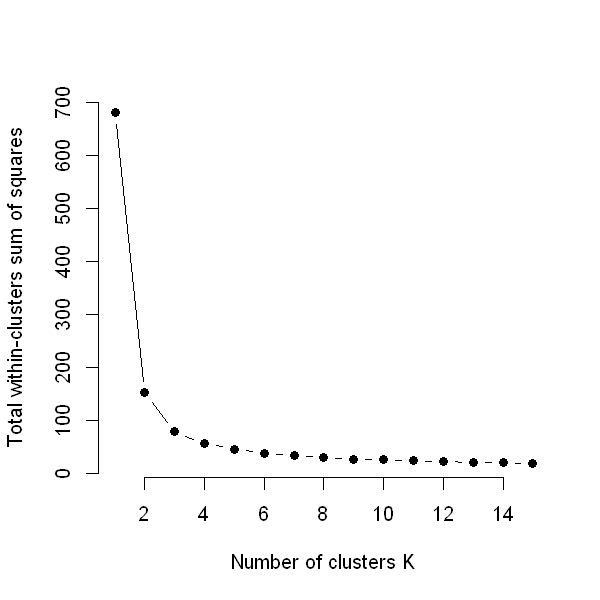

In [82]:
set.seed(1)

# function to compute total within-cluster sum of square 
wss <- function(k) {
  kmeans(iris[,1:4], k, nstart = 10 )$tot.withinss
}

# trying k = 1 to 15 to find the best number of clusters
k_values <- 1:15 

# Applying function wss to each k value
wss_values <- map_dbl(k_values, wss)

#visualizing wss versus number of clusters
options(repr.plot.width=5, repr.plot.height=5)
plot(k_values, wss_values,
       type="b", pch = 19, frame = FALSE, 
       xlab="Number of clusters K",
       ylab="Total within-clusters sum of squares")

Looking at the plot above, the elbow value suggest value of 3 is a good number of cluster to select.

In [35]:
library(factoextra)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


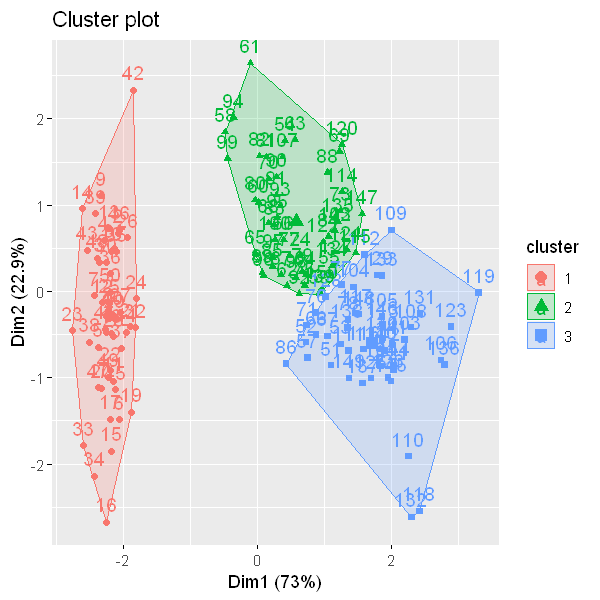

In [45]:
set.seed(123)

iris_scaled <- scale(iris[, -5])

# K-means clustering
kmeans_model <- kmeans(iris_scaled, 3, nstart = 10)

# Visualize kmeans clustering

fviz_cluster(kmeans_model, iris[, -5])

We happen to know the label for each cluster in this case. However, in real-life further analysis is needed to find the appropriate label for clusters.